In [1]:
def piece_wise_linear(beta, t):
    if t < 700:
        return beta / 10
    else:
        return beta * 10

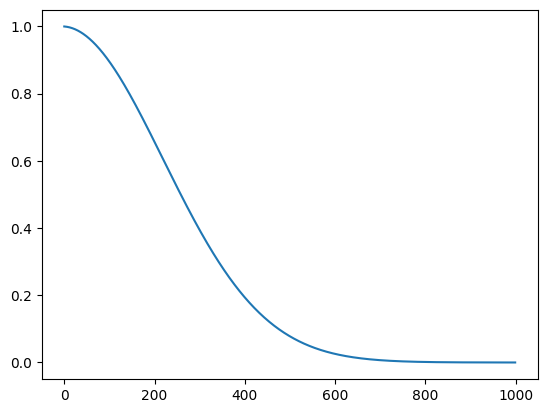

In [2]:
import numpy as np
import matplotlib.pyplot as plt

beta_start = 0.0001
beta_end = 0.02

num_train_timesteps = 1000
betas = np.linspace(beta_start, beta_end, num_train_timesteps)

alphas = 1 - betas

alphas_cumprod = np.cumprod(alphas)

plt.plot(alphas_cumprod)



In [3]:
print(1 - (alphas_cumprod[500] / alphas_cumprod[499]))
print(betas[500])

0.010059959959960008
0.010059959959959959


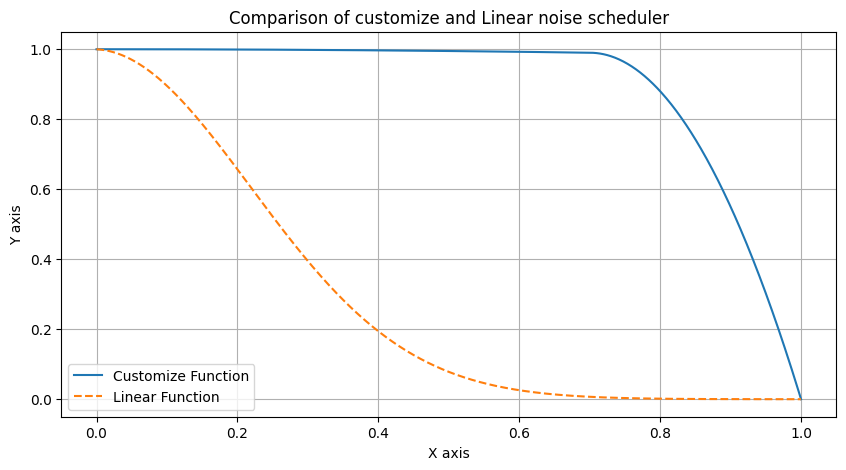

In [4]:
import math

# Define the alpha_bar_fn function, adjusted for the input scaled between 0 and 1
def alpha_bar_fn(t):
    t = t * 1000
    if t <= 700:
        return 1 - 0.01 * (t / 700)**2
    else:
        return 0.99 * (1 - ((t - 700) / 300)**2)

# Define the cosine function
def cosine(t):
    return math.cos((t + 0.008) / 1.008 * math.pi / 2) ** 2


# Generate x values from 0 to 1 (corresponding to 0 to 1000)
x_values_scaled = np.linspace(0, 1, 1000)

# Calculate y values using the alpha_bar_fn and cosine function
alpha_bar_y_values = np.array([alpha_bar_fn(x) for x in x_values_scaled])
cosine_y_values = np.array([cosine(x) for x in x_values_scaled])


beta_start = 0.0001
beta_end = 0.02

num_train_timesteps = 1000
betas = np.linspace(beta_start, beta_end, num_train_timesteps)

alphas = 1 - betas

alphas_cumprod = np.cumprod(alphas)


# Plotting both functions
plt.figure(figsize=(10, 5))
plt.plot(x_values_scaled, alpha_bar_y_values, label="Customize Function")
plt.plot(x_values_scaled, alphas_cumprod, label="Linear Function", linestyle='dashed')
plt.title("Comparison of customize and Linear noise scheduler")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.legend()
plt.show()


In [5]:
num_diffusion_timesteps = 1000
max_beta = 0.999
betas = []
for i in range(num_diffusion_timesteps):
    t1 = i / num_diffusion_timesteps
    t2 = (i + 1) / num_diffusion_timesteps
    betas.append(min(1 - alpha_bar_fn(t2) / alpha_bar_fn(t1), max_beta))


print(betas[500])

2.0533333333294657e-05
